# **Advanced Fraud Analysis and Network Insights**

# Task 6: Social Network and Cohort Analysis

# **Social Network Analysis**

Program tersebut membangun dan menganalisis jaringan buyer-seller (pembeli-penjual) berdasarkan dataset transaksi.

In [2]:
# Import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the transactions dataset
# Ganti jalur file dengan lokasi yang benar
# transactions_path = 'transactions_cleaned.csv'
# transactions_df = pd.read_csv(transactions_path)

Program menggunakan tiga pustaka utama:
- pandas untuk membaca dan memanipulasi data.
- networkx untuk membangun dan menganalisis jaringan.
- matplotlib.pyplot untuk membuat visualisasi jaringan.

In [ ]:
# Langkah 1: Verifikasi kolom dalam dataset
print("Kolom dalam dataset:", transactions_df.columns)

# Periksa apakah kolom 'flagged' dan 'blacklisted' ada
flagged_col = 'flagged' if 'flagged' in transactions_df.columns else None
blacklisted_col = 'blacklisted' if 'blacklisted' in transactions_df.columns else None

if not flagged_col or not blacklisted_col:
    print("Kolom 'flagged' atau 'blacklisted' tidak ditemukan. Atribut edge akan diabaikan.")
else:
    print(f"Kolom yang digunakan untuk atribut edge: {flagged_col}, {blacklisted_col}")

Kolom dalam dataset: Index(['dpt_id', 'dpt_promotion_id', 'buyer_id', 'seller_id',
       'transaction_amount', 'payment_method_name', 'payment_provider_name',
       'transaction_created_datetime', 'transaction_updated_datetime',
       'buyer_seller_pair', 'interaction_count', 'interaction_anomaly',
       'time_diff', 'burst_activity', 'promo_usage_count', 'promo_exploit',
       'transaction_amount_normalized', 'time_diff_normalized'],
      dtype='object')
Kolom 'flagged' atau 'blacklisted' tidak ditemukan. Atribut edge akan diabaikan.


Dataset transaksi (CSV file) dimuat ke dalam DataFrame **transactions_df**

- Kolom flagged menunjukkan apakah transaksi mencurigakan.
- Kolom blacklisted menunjukkan apakah salah satu pihak dalam transaksi ada di daftar hitam.

Jika kedua kolom ini tidak ditemukan, jaringan akan dibuat tanpa atribut edge tambahan.

In [ ]:
# Langkah 2: Bangun jaringan buyer-seller
if flagged_col and blacklisted_col:
    # Dengan atribut edge
    G = nx.from_pandas_edgelist(
        transactions_df,
        source='buyer_id',
        target='seller_id',
        edge_attr=[flagged_col, blacklisted_col],
        create_using=nx.Graph()
    )
else:
    # Tanpa atribut edge
    G = nx.from_pandas_edgelist(
        transactions_df,
        source='buyer_id',
        target='seller_id',
        create_using=nx.Graph()
    )

- Fungsi nx.from_pandas_edgelist digunakan untuk membangun jaringan dari DataFrame.
- Kolom buyer_id dan seller_id menjadi simpul (nodes).
- Atribut edge seperti flagged dan blacklisted ditambahkan jika kolom tersebut tersedia.

Jika atribut tidak tersedia, jaringan dibangun hanya berdasarkan hubungan pembeli-penjual.

In [ ]:
# Langkah 3 : Identifikasi cluster
clusters = list(nx.connected_components(G))  # Temukan cluster dalam jaringan
print(f"Jumlah cluster ditemukan: {len(clusters)}")

Jumlah cluster ditemukan: 1563


- Kluster adalah kelompok simpul yang saling terhubung.
- nx.connected_components digunakan untuk menemukan semua kluster dalam jaringan.
- Hasilnya adalah jumlah kluster dan detail komponen dalam jaringan.

In [ ]:
# Langkah 4 : Hitung centrality
centrality = nx.degree_centrality(G)  # Degree centrality untuk setiap simpul
top_central_users = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 pengguna dengan centrality tertinggi:", top_central_users)

Top 5 pengguna dengan centrality tertinggi: [('5d2233f5a1a6435891142442fac09a77809d0c16496f07b2575c3a451fbd7f60', 0.5845447589900535), ('b4c5286fbf6443dd4df37457f3ef23a2b71253b1c86452f824e8856befba3483', 0.002550369803621525), ('02611e2fdd7d730bddbd654baf24f03a739704bcb34c010c3cb54d3069087eea', 0.001530221882172915), ('ed654f3687ca1ef5da46e0d2988c906c02a740fa1fb1bf68f0d3725ac35e2201', 0.001530221882172915), ('42378015da7f47abe811170ff75251d89983d5d4063ef477657f52b50155a81f', 0.00102014792144861)]


- Degree centrality mengukur pengaruh simpul berdasarkan jumlah koneksi langsung.
- Lima pengguna dengan centrality tertinggi diidentifikasi untuk menunjukkan pengguna paling terhubung (central nodes).

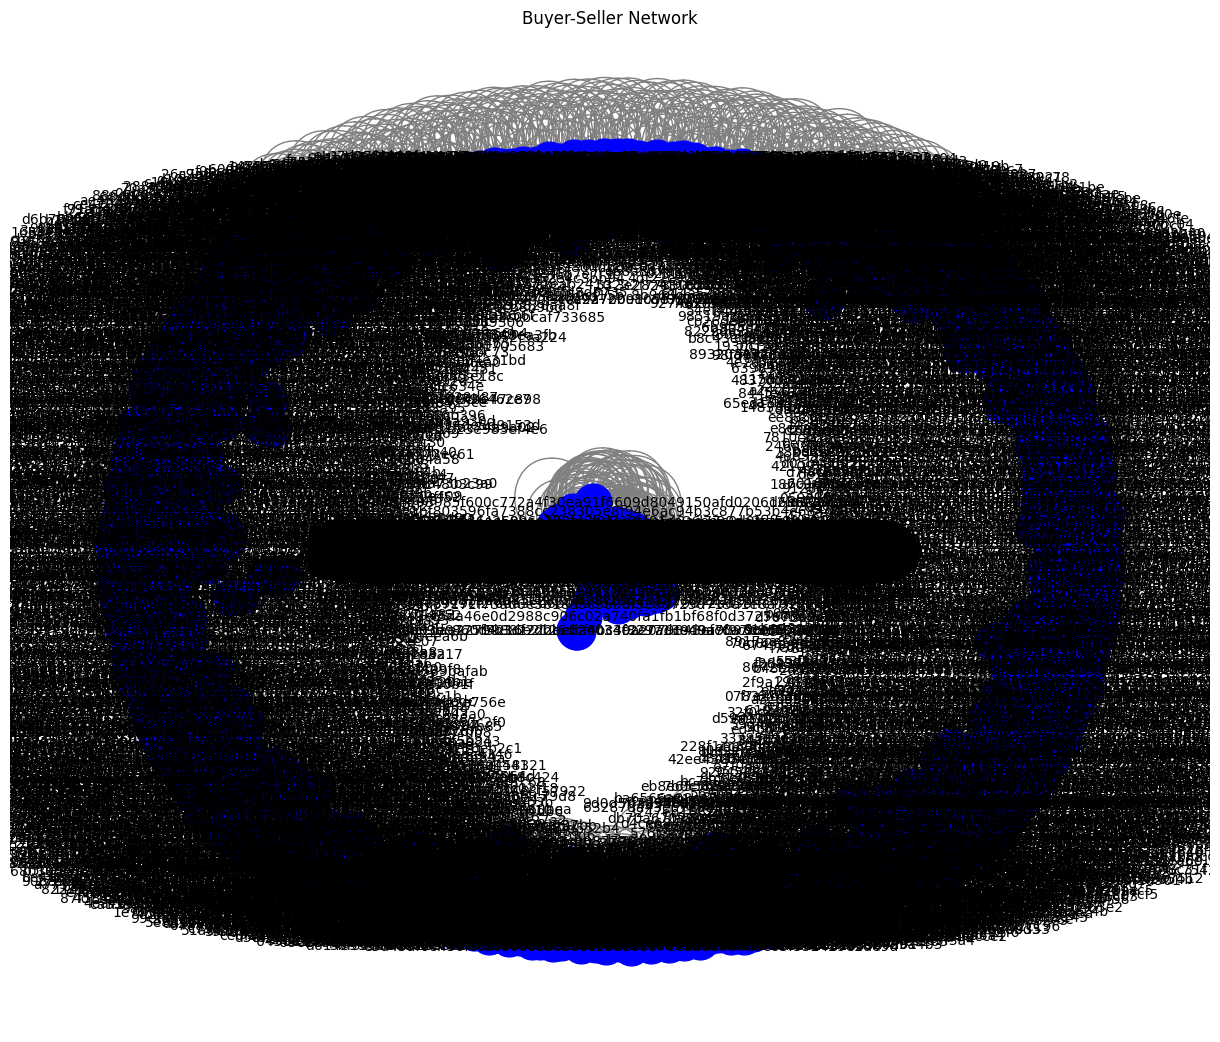

In [ ]:
# Langkah 5 : Visualisasi jaringan
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # Tata letak untuk visualisasi konsisten

# Warna node berdasarkan keterlibatan (contoh: blacklisted atau biasa)
if flagged_col and blacklisted_col:
    node_colors = [
        'red' if any(G[u][v][blacklisted_col] == 1 for u, v in G.edges(node)) else 'blue'
        for node in G
    ]
    edge_colors = [
        'orange' if data.get(flagged_col) == 1 else 'gray'
        for u, v, data in G.edges(data=True)
    ]
else:
    node_colors = 'blue'  # Semua node biru jika tidak ada atribut edge
    edge_colors = 'gray'  # Semua edge abu-abu jika tidak ada atribut edge

nx.draw(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    edge_color=edge_colors,
    node_size=700,
    font_size=10
)
plt.title("Buyer-Seller Network")
plt.show()

- Posisi node dihitung menggunakan tata letak spring untuk memastikan visualisasi konsisten.

Warna node:
- Merah jika simpul terkait dengan transaksi daftar hitam.
- Biru untuk simpul lainnya.

Warna edge:
- Oranye untuk transaksi mencurigakan.
- Abu-abu untuk transaksi normal.
- nx.draw digunakan untuk menggambar jaringan.

**Hasil**
- Analisis Kluster: Menunjukkan jumlah grup pembeli-penjual yang saling terhubung.
- Centrality Analysis: Menampilkan pengguna paling berpengaruh berdasarkan koneksi.
- Visualisasi Jaringan: Menyediakan gambaran visual hubungan pembeli-penjual, dengan warna yang menyoroti atribut khusus seperti transaksi mencurigakan atau daftar hitam.

# **Cohort Analysis**

Program ini adalah implementasi Cohort Analysis, sebuah metode untuk menganalisis perilaku pengguna berdasarkan kelompok tertentu (cohort), misalnya tanggal transaksi pertama mereka

In [ ]:
import pandas as pd

# Langkah 1: Memuat dataset
transactions_path = 'transactions_cleaned.csv'
transactions_df = pd.read_csv(transactions_path)

Dataset transaksi dimuat ke dalam variabel **transactions_df**. Data ini akan digunakan untuk analisis cohort.

In [ ]:
# Langkah 2: Cek nama kolom yang ada di dataset untuk memastikan 'transaction_date' ada
print("Kolom yang ada dalam dataset:")
print(transactions_df.columns)

Kolom yang ada dalam dataset:
Index(['dpt_id', 'dpt_promotion_id', 'buyer_id', 'seller_id',
       'transaction_amount', 'payment_method_name', 'payment_provider_name',
       'transaction_created_datetime', 'transaction_updated_datetime',
       'buyer_seller_pair', 'interaction_count', 'interaction_anomaly',
       'time_diff', 'burst_activity', 'promo_usage_count', 'promo_exploit',
       'transaction_amount_normalized', 'time_diff_normalized'],
      dtype='object')


- Program menampilkan daftar kolom dalam dataset untuk memastikan keberadaan kolom yang dibutuhkan, yaitu transaction_date.
- Jika kolom tersebut tidak ada, analisis akan berhenti, dan pesan peringatan ditampilkan.

In [ ]:
# Langkah 3: Jika kolom 'transaction_date' ada, pastikan kolom tersebut ada dan valid
if 'transaction_date' in transactions_df.columns:
    transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])  # Pastikan format datetime
else:
    print("Kolom 'transaction_date' tidak ditemukan dalam dataset.")
    # Jika kolom lain yang berisi tanggal ditemukan, bisa ganti nama kolom atau debug lebih lanjut.


Kolom 'transaction_date' tidak ditemukan dalam dataset.


- Jika kolom transaction_date ditemukan, program memastikan bahwa data di kolom tersebut diformat sebagai tipe datetime menggunakan pd.to_datetime.

Jika kolom ini tidak ada, program menampilkan pesan peringatan, dan analisis tidak dilanjutkan

In [ ]:
# Langkah 4: Jika kolom ditemukan, lanjutkan analisis cohort dan transaksi lainnya
if 'transaction_date' in transactions_df.columns:
    # Menentukan tanggal transaksi pertama setiap pembeli
    first_transaction = transactions_df.groupby('buyer_id')['transaction_date'].min().reset_index()
    first_transaction.columns = ['buyer_id', 'first_transaction_date']

    # Gabungkan kembali ke dataset asli
    transactions_df = transactions_df.merge(first_transaction, on='buyer_id', how='left')

    # Tambahkan kolom bulan cohort
    transactions_df['cohort_month'] = transactions_df['first_transaction_date'].dt.to_period('M')

    # Hitung aktivitas berulang berdasarkan cohort
    transactions_df['transaction_month'] = transactions_df['transaction_date'].dt.to_period('M')
    cohort_counts = transactions_df.groupby(['cohort_month', 'transaction_month'])['buyer_id'].nunique().reset_index()
    cohort_counts = cohort_counts.pivot(index='cohort_month', columns='transaction_month', values='buyer_id')

    # Normalisasi data cohort
    cohort_sizes = cohort_counts.iloc[:, 0]  # Jumlah pembeli unik di bulan cohort
    retention_matrix = cohort_counts.divide(cohort_sizes, axis=0)

    # Visualisasi cohort
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(12, 8))
    sns.heatmap(retention_matrix, annot=True, fmt=".0%", cmap="Blues")
    plt.title('Cohort Analysis: Retention Over Time', fontsize=16)
    plt.xlabel('Transaction Month')
    plt.ylabel('Cohort Month')
    plt.show()
else:
    print("Tidak dapat melanjutkan analisis karena kolom 'transaction_date' tidak ditemukan.")

Tidak dapat melanjutkan analisis karena kolom 'transaction_date' tidak ditemukan.


**Menentukan Tanggal Transaksi Pertama**
- Untuk setiap pembeli (buyer_id), program menghitung tanggal transaksi pertama menggunakan fungsi min.
- Hasilnya adalah sebuah tabel dengan dua kolom: buyer_id dan first_transaction_date

**Menggabungkan Data**
- Informasi tanggal transaksi pertama digabungkan kembali ke dataset utama sebagai kolom baru: **first_transaction_date**

**Menambahkan Kolom Bulan Cohort**
- Menambahkan kolom cohort_month, yang merupakan bulan transaksi pertama setiap pembeli.

**Mengelompokkan Transaksi Berdasarkan Cohort**
- Menghitung jumlah pembeli unik berdasarkan kombinasi bulan cohort dan bulan transaksi.
Hasilnya adalah tabel pivot (cohort counts) yang menunjukkan jumlah pembeli unik di setiap kombinasi bulan cohort dan bulan transaksi.

**Normalisasi Data Cohort**
- Normalisasi dilakukan dengan membagi setiap nilai di tabel cohort counts dengan ukuran cohort (jumlah pembeli di bulan cohort awal).
- Hasilnya adalah retention matrix, yaitu persentase pembeli yang masih aktif pada bulan-bulan berikutnya.

**Visualisasi Cohort**
- Program menggunakan Seaborn untuk membuat heatmap dari matriks retensi.
- Setiap sel dalam heatmap menunjukkan persentase pembeli dalam cohort tertentu yang tetap aktif di bulan berikutnya.

**Hasil**
- Menganalisis perilaku pelanggan dari waktu ke waktu.
- Mengidentifikasi retensi pelanggan dalam bulan-bulan tertentu.
- Membantu bisnis memahami efektivitas strategi akuisisi pelanggan.

# **Insight Generation**

Program ini dirancang untuk menganalisis data transaksi dan promosi guna memahami pola fraud (kecurangan) serta dampaknya terhadap promosi berdasarkan cohort (kelompok pengguna berdasarkan tanggal transaksi pertama mereka).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Langkah 1: Membaca Data
transactions_file = 'transactions_cleaned.csv'
promotions_file = 'promotions_cleaned.csv'

transactions = pd.read_csv(transactions_file)
promotions = pd.read_csv(promotions_file)

Program memuat kedua dataset ke dalam variabel transactions dan promotions.
- Dataset transactions_cleaned.csv: Berisi data transaksi seperti pembeli, penjual, nilai transaksi, dan status kecurangan.
- Dataset promotions_cleaned.csv: Berisi data promosi seperti tanggal mulai dan selesai promosi.


In [ ]:
# Langkah 2: Pemeriksaan dan Penanganan Kolom 'transaction_date'
# Memeriksa apakah kolom 'transaction_date' ada dalam DataFrame
if 'transaction_date' not in transactions.columns:
    print("Peringatan: Kolom 'transaction_date' tidak ditemukan dalam data transaksi.")
    # Menambahkan kolom 'transaction_date' dengan nilai default (misalnya, tanggal hari ini)
    # atau Anda dapat memilih untuk menghentikan eksekusi program jika kolom ini penting
    transactions['transaction_date'] = pd.to_datetime('today')  # Contoh: menggunakan tanggal hari ini
else:
    # Jika kolom ada, konversi ke format datetime
    transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], errors='coerce')
    # Menghapus baris dengan tanggal yang tidak valid setelah konversi
    transactions = transactions.dropna(subset=['transaction_date'])

Peringatan: Kolom 'transaction_date' tidak ditemukan dalam data transaksi.


- Jika kolom transaction_date tidak ditemukan, program menambahkan kolom baru dengan nilai tanggal hari ini sebagai default.
- Selanjutnya, mengonversi kolom transaction_date ke format datetime.
- Baris dengan nilai yang tidak valid setelah konversi dihapus.

In [ ]:
# Check if 'start_date' and 'end_date' columns exist in promotions DataFrame
# If they don't exist, print a warning and skip the conversion
if 'start_date' in promotions.columns and 'end_date' in promotions.columns:
    # Konversi kolom tanggal promosi ke format datetime
    promotions['start_date'] = pd.to_datetime(promotions['start_date'], errors='coerce')
    promotions['end_date'] = pd.to_datetime(promotions['end_date'], errors='coerce')
else:
    print("Peringatan: Kolom 'start_date' atau 'end_date' tidak ditemukan dalam data promosi.")

# Pastikan kolom penting tersedia
# Print the available columns to check their names
print("Available columns in transactions:", transactions.columns)

# Adjust the subset based on the actual column names
# Assuming 'transaction_value' is 'transaction_amount' and 'flagged' is 'interaction_anomaly'
# Please update these if they are different in your dataset
transactions = transactions.dropna(subset=['buyer_id', 'seller_id', 'transaction_amount', 'interaction_anomaly'])

Peringatan: Kolom 'start_date' atau 'end_date' tidak ditemukan dalam data promosi.
Available columns in transactions: Index(['dpt_id', 'dpt_promotion_id', 'buyer_id', 'seller_id',
       'transaction_amount', 'payment_method_name', 'payment_provider_name',
       'transaction_created_datetime', 'transaction_updated_datetime',
       'buyer_seller_pair', 'interaction_count', 'interaction_anomaly',
       'time_diff', 'burst_activity', 'promo_usage_count', 'promo_exploit',
       'transaction_amount_normalized', 'time_diff_normalized',
       'transaction_date'],
      dtype='object')


- Jika kolom start_date dan end_date ada di dataset promosi, program mengonversinya ke format datetime.
- Jika tidak ada, program mencetak peringatan.

- Program memeriksa keberadaan kolom penting seperti buyer_id, seller_id, transaction_amount, dan interaction_anomaly.
- Baris yang memiliki nilai kosong pada kolom ini dihapus.

In [ ]:
# Langkah 4: Menghubungkan Transaksi dengan Promosi
def is_during_promotion(transaction_date, promotions):
    # Check if promotions DataFrame has 'start_date' and 'end_date' columns
    if 'start_date' in promotions.columns and 'end_date' in promotions.columns:
        for _, promo in promotions.iterrows():
            if promo['start_date'] <= transaction_date <= promo['end_date']:
                return True
    return False # Return False if columns are missing to avoid errors

transactions['during_promotion'] = transactions['transaction_date'].apply(
    lambda x: is_during_promotion(x, promotions)
)

**Menentukan Apakah Transaksi Terjadi Selama Promosi**
- Fungsi is_during_promotion memeriksa apakah tanggal transaksi berada dalam rentang tanggal promosi.
- Kolom baru during_promotion ditambahkan ke dataset transaksi untuk menandai apakah transaksi terjadi selama promosi.

In [ ]:
# Analisis Cohort dan Fraud
# Tambahkan kolom cohort (bulan transaksi pertama)
transactions['first_transaction_date'] = transactions.groupby('buyer_id')['transaction_date'].transform('min')
transactions['cohort_month'] = transactions['first_transaction_date'].dt.to_period('M')

# Kelompokkan data berdasarkan cohort dan status promosi
# Replace 'flagged' with 'interaction_anomaly' if that's the correct column
fraud_analysis = transactions.groupby(['cohort_month', 'during_promotion'])['interaction_anomaly'].sum().unstack(fill_value=0)

**Menambahkan Kolom Cohort**
- Cohort ditentukan berdasarkan tanggal transaksi pertama setiap pembeli.
- Kolom cohort_month menunjukkan bulan pertama transaksi.

**Mengelompokkan Data Berdasarkan Cohort dan Promosi**
- Data dikelompokkan berdasarkan cohort_month dan status during_promotion.
- Jumlah kasus kecurangan (interaction_anomaly) dihitung untuk setiap kombinasi

<Figure size 1200x800 with 0 Axes>

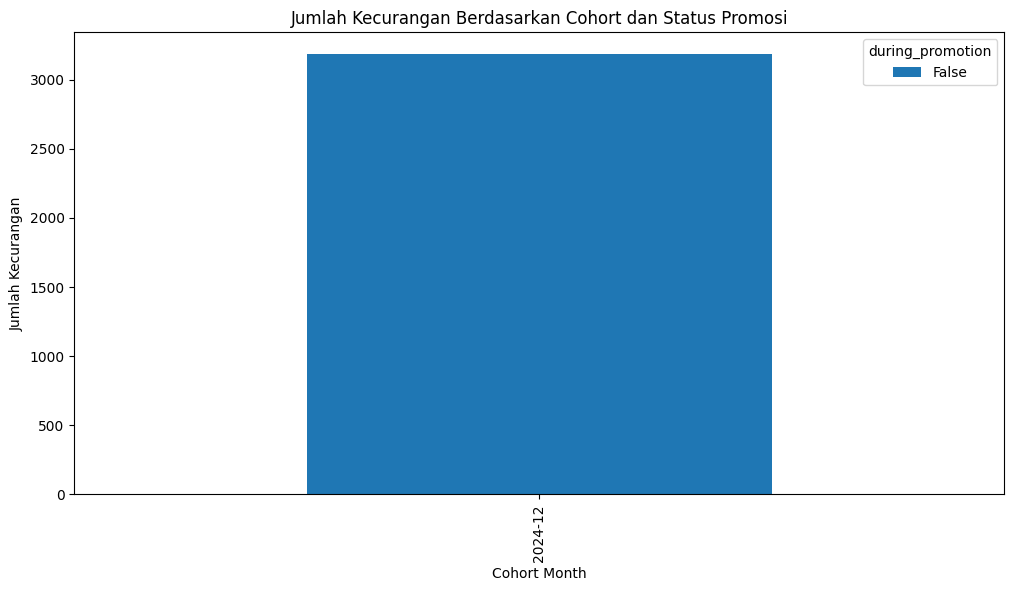

In [ ]:
# Langkah 6: Visualisasi Pola Kecurangan
plt.figure(figsize=(12, 8))
fraud_analysis.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Jumlah Kecurangan Berdasarkan Cohort dan Status Promosi')
plt.xlabel('Cohort Month')
plt.ylabel('Jumlah Kecurangan') # Added a y-axis label
plt.show()

- Bar Chart Stacked: Menampilkan jumlah kasus kecurangan per cohort, dibagi berdasarkan transaksi yang terjadi selama promosi dan tidak.
- Warna tumpukan membantu membedakan status promosi.

**Hasil**
- Deteksi Kecurangan: Memahami pola kecurangan selama promosi.
- Evaluasi Promosi: Menilai dampak promosi terhadap perilaku pelanggan.
- Pengambilan Keputusan: Membantu bisnis dalam strategi promosi untuk meminimalkan risiko kecurangan.